# Minor - 5 - Black Friday Sales Prediction

A retail company wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
# import libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_data = pd.read_csv("D:\Github_slash_mark_project\slash_mark_project\minor-5\data\BlackFridaySales.csv")

In [4]:
raw_data.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [5]:
raw_data.shape

(550068, 12)

In [6]:
# Check Variable and datatype 

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


`Age` should be treated as a numerical column

`City_Category` we can convert this to a numerical column and should look at the frequency of each city category.

`Gender` has two values and should be converted to binary values

`Product_Category_2` and `Product_Category_3` have null values

In [8]:
# Checking Null values 

In [9]:
raw_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
# Check null variable in persantage 

In [11]:
raw_data.isnull().sum()/raw_data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

There are 31% null values in the `Product_Category_2` and 69% null values in the `Product_Category_3`

In [12]:
# there are 31 and 69 pesantage values which are null so we can not delete those data we need to fix this valuse 

# Visulization of data

In [13]:
# in Our case Target variable is Purchase 

C:\Users\Krunal\AppData\Local\Temp\ipykernel_16920\1309020208.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data["Purchase"],color='r')


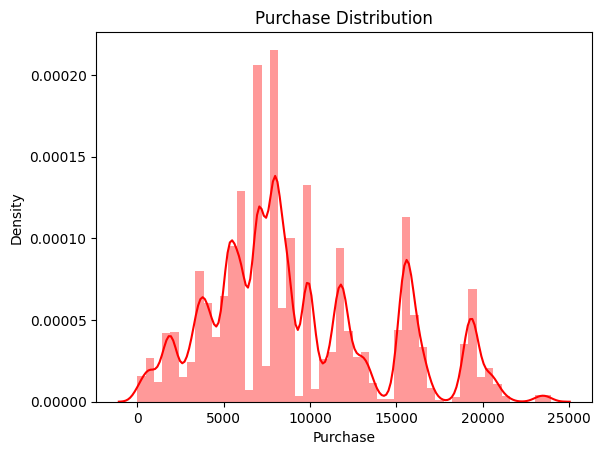

In [14]:
sns.distplot(raw_data["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

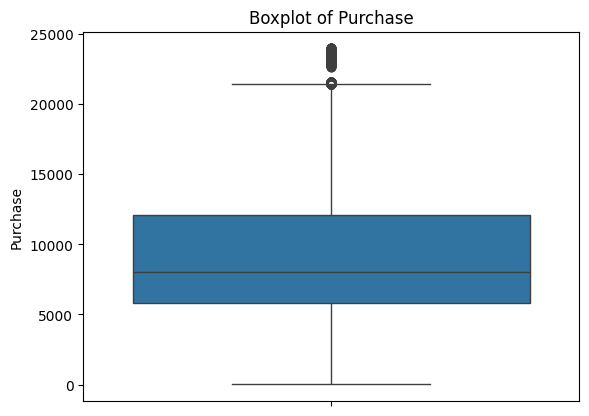

In [15]:
sns.boxplot(raw_data["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()


In [16]:
raw_data["Purchase"].skew()

0.6001400037087128

In [17]:
raw_data["Purchase"].kurtosis()

-0.3383775655851702

In [18]:
raw_data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [19]:
raw_data["Purchase"]

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [20]:
# Gender Variable 

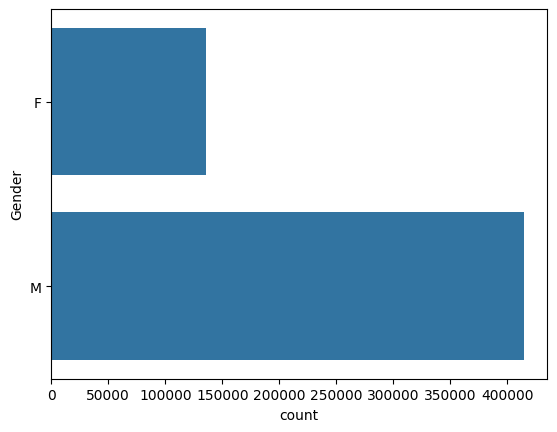

Gender
M    75.310507
F    24.689493
Name: proportion, dtype: float64

In [21]:
sns.countplot(raw_data['Gender'])
plt.show()

raw_data['Gender'].value_counts(normalize=True)*100

In [22]:
raw_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [23]:
raw_data.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [24]:
raw_data['Stay_In_Current_City_Years'] = raw_data['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")

In [25]:
raw_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [26]:
## Encoding the categorical variables       


In [27]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [28]:
raw_data['Gender'] = lr.fit_transform(raw_data['Gender'])

In [29]:
raw_data['Age'] = lr.fit_transform(raw_data['Age'])

In [30]:
raw_data.head(0)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [31]:
raw_data['City_Category'] = lr.fit_transform(raw_data['City_Category'])

In [32]:
raw_data['Product_Category_2'] = raw_data['Product_Category_2'].fillna(raw_data['Product_Category_2'].median()).astype('int64')
raw_data['Product_Category_3'] = raw_data['Product_Category_3'].fillna(raw_data['Product_Category_3'].median()).astype('int64')

In [33]:
raw_data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [34]:
df = raw_data.copy()

In [35]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9,14,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9,14,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,14,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9,14,7969


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  int32 
 3   Age                         550068 non-null  int32 
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  int32 
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Product_Category_2          550068 non-null  int64 
 10  Product_Category_3          550068 non-null  int64 
 11  Purchase                    550068 non-null  int64 
dtypes: int32(3), int64(7), object(2)
memory usage: 44.1+ MB


In [37]:
# Drop Columns 

In [38]:
df = df.drop(["User_ID","Product_ID"],axis=1)

In [39]:
df.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,9,14,8370
1,0,0,10,0,2,0,1,6,14,15200


In [40]:
## Splitting data into independent and dependent variables

In [41]:

X = df.drop("Purchase",axis=1)

In [83]:
X

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,0,3,9,14
1,0,0,10,0,2,0,1,6,14
2,0,0,10,0,2,0,12,9,14
3,0,0,10,0,2,0,12,14,14
4,1,6,16,2,4,0,8,9,14
...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,9,14
550064,0,2,1,2,3,0,20,9,14
550065,0,2,15,1,4,1,20,9,14
550066,0,6,1,2,2,0,20,9,14


In [42]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,0,3,9,14
1,0,0,10,0,2,0,1,6,14
2,0,0,10,0,2,0,12,9,14
3,0,0,10,0,2,0,12,14,14
4,1,6,16,2,4,0,8,9,14


In [43]:

y=df['Purchase']

In [44]:
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [45]:
# Split into trian and test and make Model 

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Model 

In [47]:
# model - 1 -  Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [50]:
lr.intercept_

11300.391784538051

In [51]:
lr.coef_

array([ 508.76688204,  126.64407959,    5.75875645,  345.41665369,
          1.6500983 ,  -65.05622562, -416.04817146,  -51.54162426,
        -27.27608322])

In [52]:

y_pred = lr.predict(X_test)

In [53]:
# Display the hypothesis line equation
coefficients = lr.coef_
intercept = lr.intercept_

print("Hypothesis Line: y = ", end="")
for i, coef in enumerate(coefficients):
    print(f"({coef}) * X{i+1} + ", end="")
print(f"({intercept})")

Hypothesis Line: y = (508.7668820380614) * X1 + (126.64407958982211) * X2 + (5.758756450179099) * X3 + (345.4166536852324) * X4 + (1.6500983040322315) * X5 + (-65.0562256231071) * X6 + (-416.04817146280715) * X7 + (-51.54162426262926) * X8 + (-27.27608322185537) * X9 + (11300.391784538051)


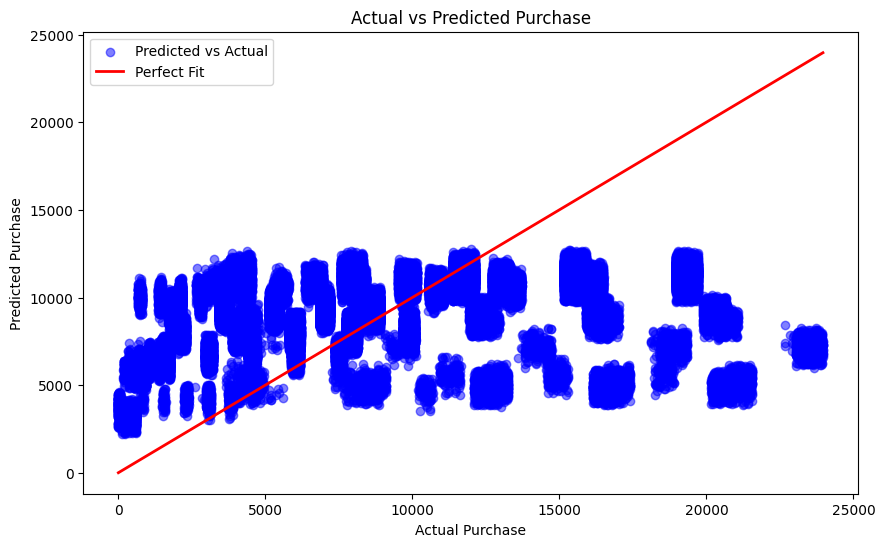

In [54]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')

# Plot the regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Fit')

# Add labels and title
plt.xlabel('Actual Purchase')
plt.ylabel('Predicted Purchase')
plt.title('Actual vs Predicted Purchase')
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [56]:

mean_absolute_error(y_test, y_pred)

3594.0116371323547

In [57]:
mean_squared_error(y_test, y_pred)

22042357.902702812

In [58]:
r2_score(y_test, y_pred)

0.1263855088657524

In [59]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  4694.928956086856


# DecisionTreeRegressor

In [60]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  

In [61]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [62]:
dt_y_pred = regressor.predict(X_test)

In [63]:
mean_absolute_error(y_test, dt_y_pred)

2360.36866906327

In [64]:
mean_squared_error(y_test, dt_y_pred)

11176053.62245156

In [65]:
r2_score(y_test, dt_y_pred)

0.5570545382955656

In [66]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Linear Regression Model is  3343.0605173181593


# Random Forest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0)  

In [68]:
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [69]:
rf_y_pred = RFregressor.predict(X_test)

In [70]:
mean_absolute_error(y_test, rf_y_pred)

2221.024633835492

In [71]:
mean_squared_error(y_test, rf_y_pred)

9310080.62652396

In [72]:
r2_score(y_test, rf_y_pred)

0.6310094689115707

In [73]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Linear Regression Model is  3051.242472587841


# XGBoost Regressor

In [74]:
from xgboost.sklearn import XGBRegressor

In [75]:
# Convert 'Stay_In_Current_City_Years' to numeric
X_train['Stay_In_Current_City_Years'] = X_train['Stay_In_Current_City_Years'].astype(int)
X_test['Stay_In_Current_City_Years'] = X_test['Stay_In_Current_City_Years'].astype(int)

xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [76]:
xgb_y_pred = xgb_reg.predict(X_test)

In [77]:
mean_absolute_error(y_test, xgb_y_pred)

2148.6760796399158

In [78]:
mean_squared_error(y_test, xgb_y_pred)

8283836.071681714

In [79]:
r2_score(y_test, xgb_y_pred)

0.671683132648468

In [80]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of Linear Regression Model is  2878.165400334337


In [81]:
# Scatter plot for each model#

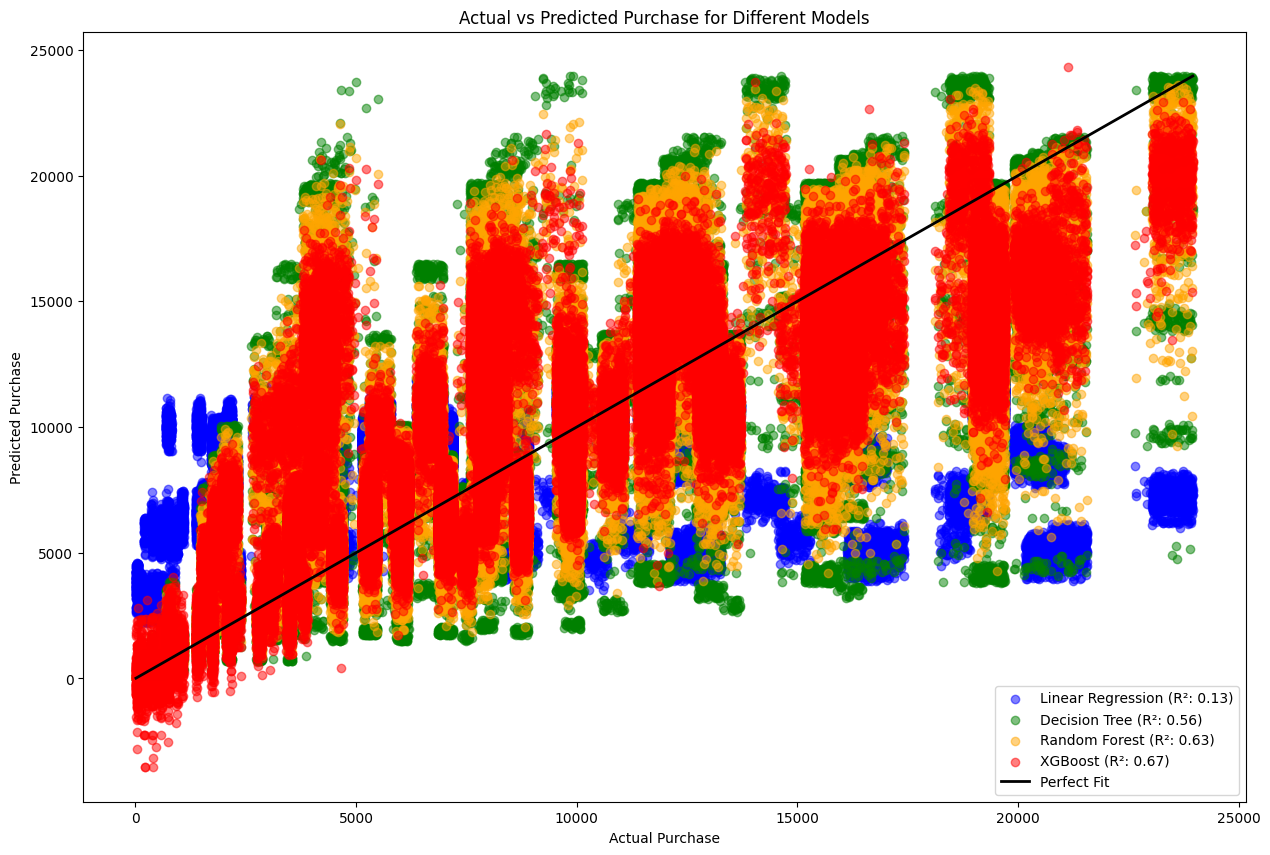

In [82]:
# Scatter plot for each model with R² score
plt.figure(figsize=(15, 10))

# Linear Regression
plt.scatter(y_test, y_pred, alpha=0.5, label=f'Linear Regression (R²: {r2_score(y_test, y_pred):.2f})', color='blue')

# Decision Tree Regressor
plt.scatter(y_test, dt_y_pred, alpha=0.5, label=f'Decision Tree (R²: {r2_score(y_test, dt_y_pred):.2f})', color='green')

# Random Forest Regressor
plt.scatter(y_test, rf_y_pred, alpha=0.5, label=f'Random Forest (R²: {r2_score(y_test, rf_y_pred):.2f})', color='orange')

# XGBoost Regressor
plt.scatter(y_test, xgb_y_pred, alpha=0.5, label=f'XGBoost (R²: {r2_score(y_test, xgb_y_pred):.2f})', color='red')

# Plot the perfect fit line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linewidth=2, label='Perfect Fit')

# Add labels, title, and legend
plt.xlabel('Actual Purchase')
plt.ylabel('Predicted Purchase')
plt.title('Actual vs Predicted Purchase for Different Models')
plt.legend()
plt.show()